##Task-1 To Explore Supervised Machine Learning
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np  
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC, SVC
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Cleaning the Dataset
It’s a necessary step to clean the data in its pre-processing stage. For strings, therefore, we define a function for attaining the same.

In [ ]:
def clean_str(string):
    string = re.sub(r"\n", "", string)
    string = re.sub(r"\r", "", string)
    string = re.sub(r"[0-9]", "digit", string)
    string = re.sub(r"\'", "", string)
    string = re.sub(r"\"", "", string)
    
    return string.strip().lower()

##Reading CSV Dataset

In [ ]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)


In [ ]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


##Getting information about Dataset



In [ ]:
df.info()
nRowsRead = 'None'
df.dataframeName = 'dataset.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
There are 25 rows and 2 columns


In [ ]:
df.describe()
print('Dataset Lenght:: ', len(df))
print('Dataset Shape:: ', df.shape)

Dataset Lenght::  25
Dataset Shape::  (25, 2)


Count of students getting a particular score. This will give us an idea for score distribution.

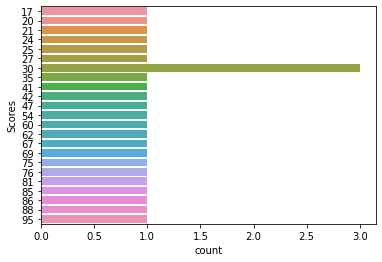

In [ ]:
sns.countplot(y="Scores", data=df)

Scores Distribution Plot

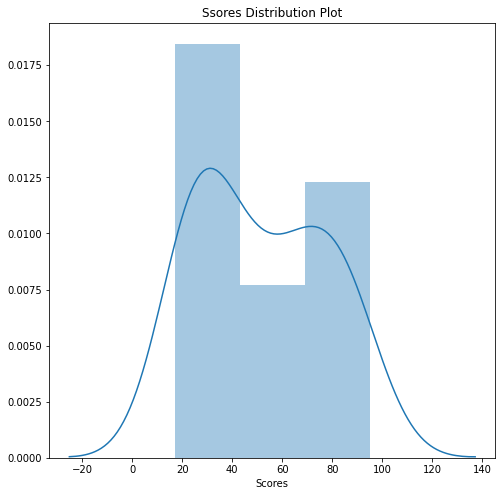

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Ssores Distribution Plot')
sns.distplot(df['Scores'])

##Finding and Filling NULL values.

Calculating the Missing Values % contribution in DF



In [ ]:
df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

Scores    0.0
Hours     0.0
dtype: float64

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df = df.fillna(method = 'bfill')#Filling of NULL values using backfilling
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

##Outlier Analysis
We may run an analysis for outliers for maximum contribution to inconsistency.

Text(0.5, 0, 'Continuous Variable')

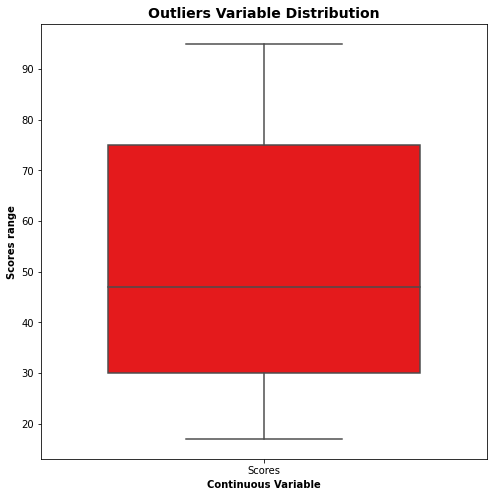

In [ ]:
outliers = ['Scores']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient='v', palette='Set1' ,whis=1.5,saturation=1, width=0.7)
plt.title('Outliers Variable Distribution', fontsize = 14, fontweight = 'bold')
plt.ylabel('Scores range', fontweight = 'bold')
plt.xlabel('Continuous Variable', fontweight = 'bold')

##Visual Plotting of Dataset for distribution of scores

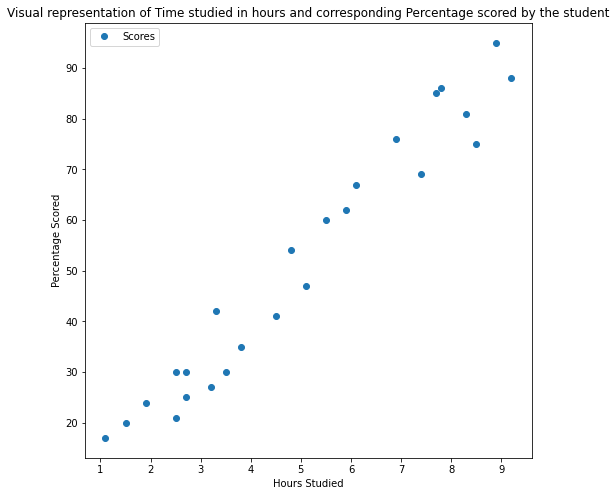

In [ ]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Visual representation of Time studied in hours and corresponding Percentage scored by the student')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

##Splitting of Training and Test Datasets.

In [ ]:
X = df.drop(['Scores'],axis=1)
y = df['Scores'] 
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

##Linear Regression

Training the Dataest

In [ ]:
linearRegressor = LinearRegression()  
linearRegressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting the Regressor line

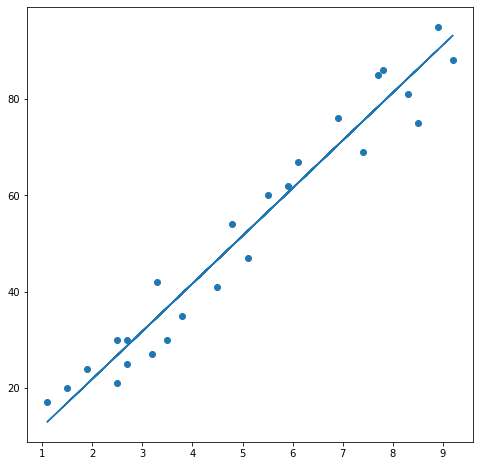

In [ ]:
line = linearRegressor.coef_*X+linearRegressor.intercept_
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Intercept and Slope

In [ ]:
#To retrieve the intercept:
print(linearRegressor.intercept_)
#For retrieving the slope:
print(linearRegressor.coef_)

2.018160041434662
[9.91065648]


##Predictive analysis

In [ ]:
y_predicted = linearRegressor.predict(X_test)
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})  
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


Testing on custom Data

In [ ]:
#Enter your custom x in the times variable
time = 9.5
custom = linearRegressor.predict(np.array([time]).reshape(1, 1))
print("No of Hours -> {}".format(time))
print("Predicted Score -> {}".format(custom[0]))

No of Hours -> 9.5
Predicted Score -> 96.16939660753593


##Evaluation Metrics

Mean squared error, R2 score and Mean absolute error. 

In [ ]:
mse = mean_squared_error(y_test, y_predicted)
r = r2_score(y_test, y_predicted)
mae = mean_absolute_error(y_test,y_predicted)
print("Mean Squared Error:",mse)
print("R score:",r)
print("Mean Absolute Error:",mae)

Mean Squared Error: 21.598769307217456
R score: 0.9454906892105354
Mean Absolute Error: 4.183859899002982


Plotting of regression line with Test data

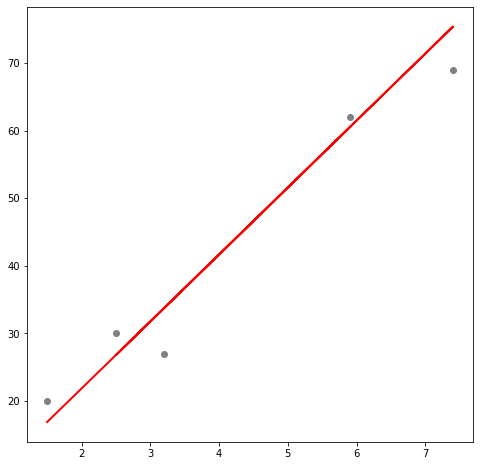

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_predicted, color='red', linewidth=2)
plt.show()

Visual Representation of Actual test data and Predicted Values

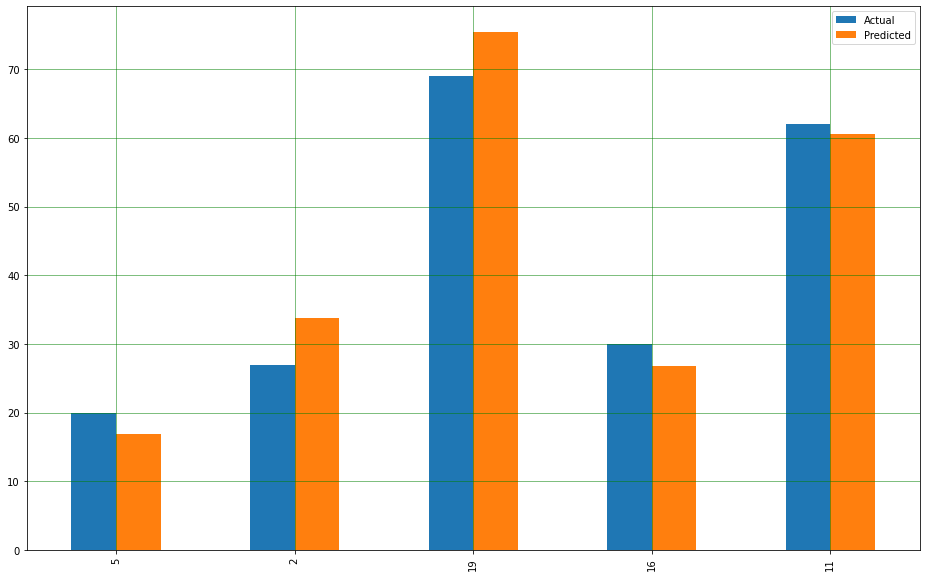

In [ ]:
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()